In [1]:
import datetime,time
import numpy as np
import pandas as pd
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# label_code
label_code = ['Benign','Bot','DDOS attack-LOIC-UDP','DDOS attack-HOIC','DDoS attacks-LOIC-HTTP','DoS attacks-GoldenEye',
              'DoS attacks-Hulk', 'DoS attacks-Slowloris','SSH-Bruteforce','FTP-BruteForce',
              'Infilteration','Brute Force -Web','Brute Force -XSS','SQL Injection']

In [2]:
x_train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/original_x_train.pkl')
y_train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/original_y_train.pkl')
x_test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/original_x_test.pkl')
y_test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/original_y_test.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/IDS/CIC-IDS2018/pkl/original_x_train.pkl'

In [3]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train =np.array(y_train)
y_test =np.array(y_test)

# Random Forest

Training time: 83
Testing time: 2
Classification Report
                        precision    recall  f1-score   support

                Benign     0.8580    0.9077    0.8822      8000
                   Bot     0.9995    0.9995    0.9995      4000
  DDOS attack-LOIC-UDP     0.9886    1.0000    0.9943       346
      DDOS attack-HOIC     0.9988    0.9998    0.9993      4000
DDoS attacks-LOIC-HTTP     0.9995    0.9985    0.9990      4000
 DoS attacks-GoldenEye     1.0000    1.0000    1.0000      4000
      DoS attacks-Hulk     0.9998    1.0000    0.9999      4000
 DoS attacks-Slowloris     1.0000    1.0000    1.0000      1982
        SSH-Bruteforce     1.0000    0.9990    0.9995      4000
        FTP-BruteForce     0.9000    1.0000    0.9474         9
         Infilteration     0.7918    0.6997    0.7429      4000
      Brute Force -Web     0.9123    0.9455    0.9286       110
      Brute Force -XSS     0.9778    0.9565    0.9670        46
         SQL Injection     0.8333    0.6250    

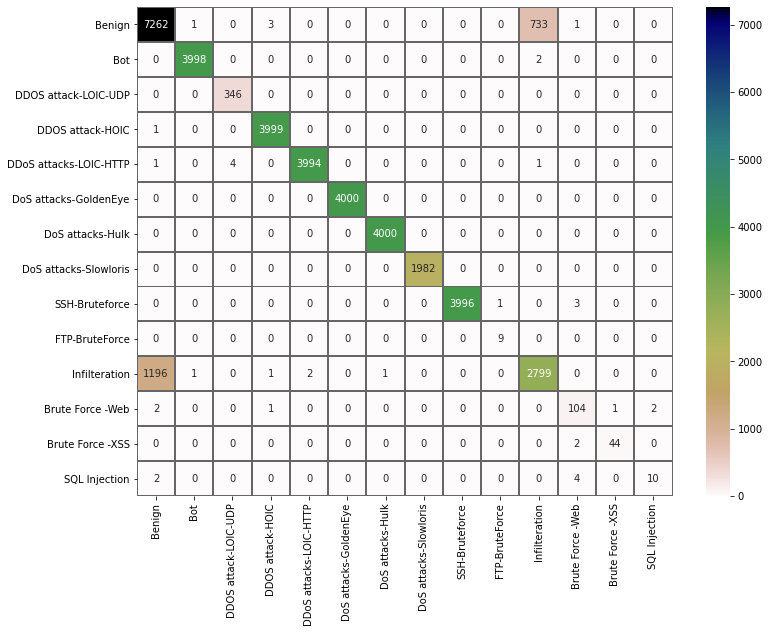

In [4]:
# RandomForestClassifier
# fit
fit_startime = datetime.datetime.now()
model = RandomForestClassifier(n_estimators=200)
model = model.fit(x_train, y_train.ravel())
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = label_code, digits=4))


predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)

# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=label_code, yticklabels=label_code)
plt.show()

# SVM

Training time: 402
Testing time: 0
Classification Report
                        precision    recall  f1-score   support

                Benign     0.7596    0.9563    0.8467      8000
                   Bot     0.9970    0.9902    0.9936      4000
  DDOS attack-LOIC-UDP     0.9858    1.0000    0.9928       346
      DDOS attack-HOIC     0.9877    0.9998    0.9937      4000
DDoS attacks-LOIC-HTTP     0.9739    0.9990    0.9863      4000
 DoS attacks-GoldenEye     0.9958    0.9972    0.9965      4000
      DoS attacks-Hulk     0.9960    1.0000    0.9980      4000
 DoS attacks-Slowloris     0.9970    0.9990    0.9980      1982
        SSH-Bruteforce     1.0000    0.9990    0.9995      4000
        FTP-BruteForce     0.7500    1.0000    0.8571         9
         Infilteration     0.8387    0.3718    0.5152      4000
      Brute Force -Web     0.6452    0.7273    0.6838       110
      Brute Force -XSS     0.6842    0.5652    0.6190        46
         SQL Injection     0.3636    0.2500   

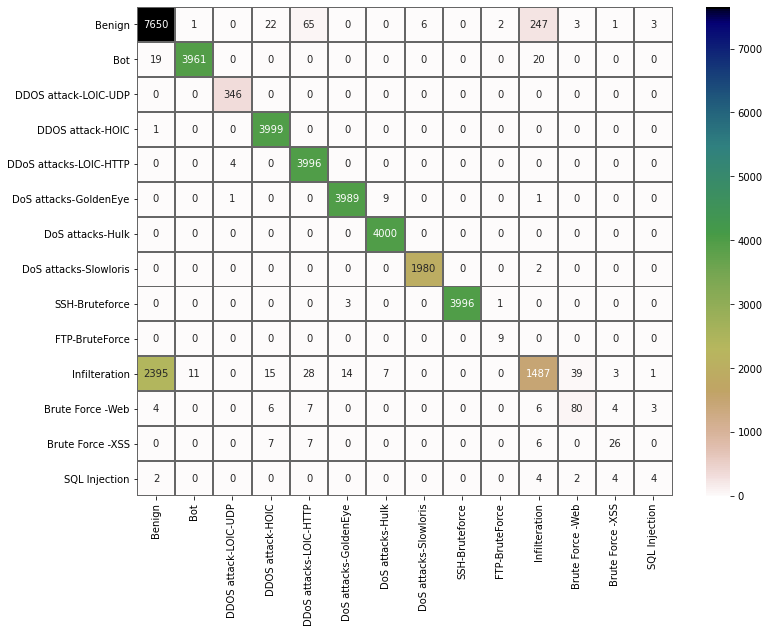

In [6]:
# fit
fit_startime = datetime.datetime.now()
model = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, 
                      multi_class='ovr', fit_intercept=True, 
                      intercept_scaling=1, class_weight=None, 
                      verbose=0, random_state=None, max_iter=1000)

model = model.fit(x_train, y_train.ravel())
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = label_code, digits=4))


predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)



# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=label_code, yticklabels=label_code)
plt.show()

# XGBoost

Training time: 558
Testing time: 1
Classification Report
                        precision    recall  f1-score   support

                Benign     0.7897    0.9724    0.8716      8000
                   Bot     1.0000    0.9998    0.9999      4000
  DDOS attack-LOIC-UDP     0.9886    1.0000    0.9943       346
      DDOS attack-HOIC     0.9995    1.0000    0.9998      4000
DDoS attacks-LOIC-HTTP     0.9997    0.9982    0.9990      4000
 DoS attacks-GoldenEye     0.9988    0.9995    0.9991      4000
      DoS attacks-Hulk     1.0000    0.9998    0.9999      4000
 DoS attacks-Slowloris     0.9985    1.0000    0.9992      1982
        SSH-Bruteforce     1.0000    0.9990    0.9995      4000
        FTP-BruteForce     0.9000    1.0000    0.9474         9
         Infilteration     0.8966    0.4855    0.6299      4000
      Brute Force -Web     1.0000    0.8545    0.9216       110
      Brute Force -XSS     0.9184    0.9783    0.9474        46
         SQL Injection     0.6667    0.5000   

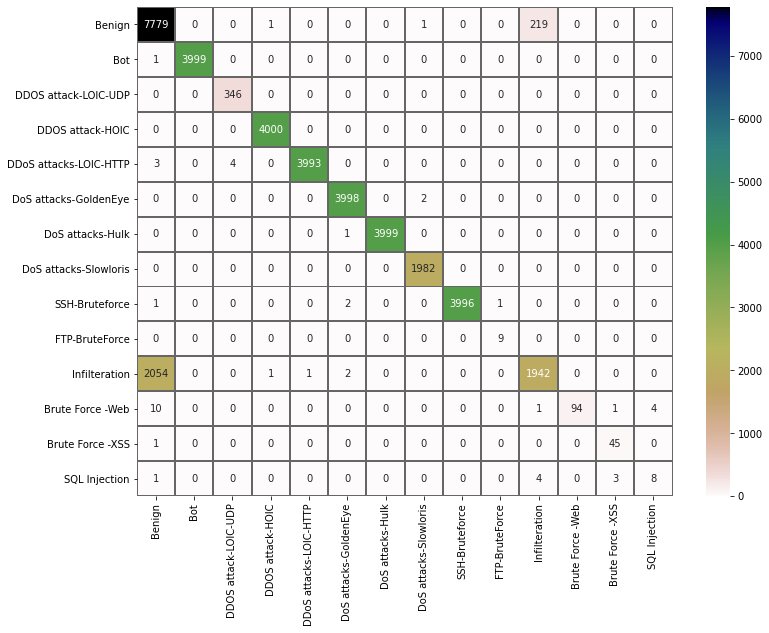

In [7]:
from xgboost import XGBClassifier

fit_startime = datetime.datetime.now()               
model = XGBClassifier(objective='multi:softmax', booster='gbtree', verbosity=0,silent=0,learning_rate=0.1)

model.fit(x_train, y_train.ravel(), eval_metric='mlogloss')
fit_endtime = datetime.datetime.now()
print('Training time:',(fit_endtime - fit_startime).seconds)

# expeced
expected = y_test.ravel()

# Testing
test_startime = datetime.datetime.now()
predicted = model.predict(x_test)
test_endtime = datetime.datetime.now()
print("Testing time:",(test_endtime - test_startime).seconds)

# Pre, Recall, F1-score 
print('Classification Report')
print(classification_report(expected, predicted, target_names = label_code, digits=4))


predicted = [np.round(x) for x in predicted]
predicted = np.array(predicted)



# confusion matrix
cm = metrics.confusion_matrix(expected, predicted)
f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(cm, annot=True, fmt='0.6g',  linewidths=1 ,cmap='gist_earth_r', linecolor='#666666',
                 xticklabels=label_code, yticklabels=label_code)
plt.show()